## Linear Regression Practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv("Salary_dataset.csv")

In [4]:
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
dataset.pop(dataset.columns[0])

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
Name: Unnamed: 0, dtype: int64

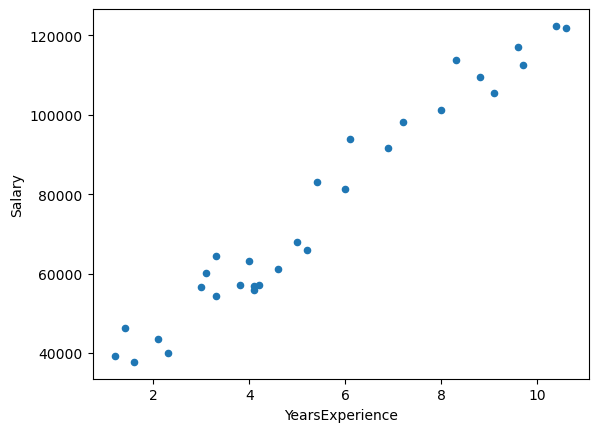

In [17]:
dataset.plot.scatter(x='YearsExperience', y='Salary');

In [18]:
X=dataset['YearsExperience'].values.reshape(-1,1)
Y=dataset['Salary'].values.reshape(-1,1)

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=1)

In [28]:
x_train

array([[ 8.3],
       [ 2.3],
       [ 1.6],
       [ 9.1],
       [ 3.1],
       [ 6. ],
       [ 4.2],
       [ 3.3],
       [ 9.7],
       [ 1.4],
       [ 5.2],
       [ 1.2],
       [ 5. ],
       [10.6],
       [10.4],
       [ 3.8],
       [ 3.3],
       [ 4.1],
       [ 4.1],
       [ 3. ]])

### Fitting Simple Linear Regression to the Training set

In [14]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [30]:
print(regressor.intercept_)

[25222.42609432]


In [31]:
print(regressor.coef_)

[[9158.13919873]]


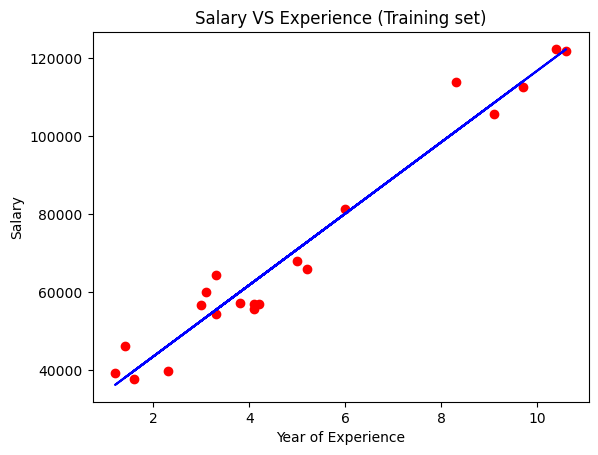

In [33]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(x_train, regressor.predict(x_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

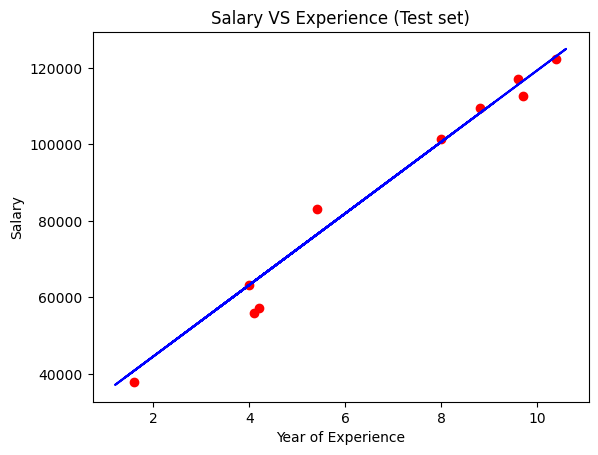

In [26]:
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, regressor.predict(x_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

### Predicting the result of 4 Years Experience

In [40]:
y_pred4 = regressor.predict([[4.0]])
print(y_pred4)

[[61854.98288925]]


In [41]:
y_pred = regressor.predict(x_test)

In [45]:
df_comparison = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_comparison)

     Actual      Predicted
0   83089.0   74676.377767
1   98274.0   91161.028325
2   63219.0   61854.982889
3   93941.0   81087.075207
4   61112.0   67349.866408
5   91739.0   88413.586566
6  116970.0  113140.562402
7   43526.0   44454.518412
8  109432.0  105814.051043
9  101303.0   98487.539684


## Evaluating the Model

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mae = mean_absolute_error(y_test, y_pred) #the average of the absolute differences between the predicted and actual values
mse = mean_squared_error(y_test, y_pred) # the average of the squared differences between the predicted and actual values
rmse = np.sqrt(mse) #measure of the spread of errors

In [49]:
print(f'Mean absolute error: {mae:}')
print(f'Mean squared error: {mse:}')
print(f'Root mean squared error: {rmse:}')

Mean absolute error: 5049.818093659744
Mean squared error: 37496296.6187984
Root mean squared error: 6123.421969683161


Not bad considering the size of the dataset we have